In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 53.3 MB/s eta 0:00:00


In [3]:
import random
import numpy as np
import torch

def set_seed(seed: int = 42):
    random.seed(seed)  # Python's built-in random module
    np.random.seed(seed)  # NumPy random generator
    torch.manual_seed(seed)  # PyTorch random generator
    torch.cuda.manual_seed(seed)  # For CUDA random generator (if using GPU)
    torch.cuda.manual_seed_all(seed)  # If using multi-GPU setup
    torch.backends.cudnn.deterministic = True  # Ensures deterministic behavior
    torch.backends.cudnn.benchmark = False  # May reduce performance slightly but ensures reproducibility

set_seed(150102)


In [8]:
# Import necessary libraries
import os
import torch
from ultralytics import YOLO

# Configuration class
class Config:
    IMG_SIZE = 640
    BATCH_SIZE = 32
    EPOCHS = 45
    LEARNING_RATE = 3e-4
    NUM_CLASSES = 55
    DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

    CLASSES = ['asparagus', 'avocados', 'broccoli', 'cabbage',        #4
               'celery', 'cucumber', 'green_apples', 'green_beans', #4
               'green_capsicum', 'green_grapes', 'kiwifruit', #3
               'lettuce', 'limes', 'peas', 'spinach',  #4
               'Banana', 'Cauliflower', 'Date', 'Garlic', #4
               'Ginger', 'Mushroom', 'Onion', 'Parsnip', #4
               'Peach', 'Pear', 'Potato', 'Turnip', #4
               'Beetroot', 'Blackberry', 'Blueberry', 'Cherry', #4
               'Eggplant', 'Plum', 'Purple asparagus', 'Purple grapes',  #4
               'Radish', 'Raspberry', 'Red Apple', 'Red Grape', #4
               'Red cabbage', 'Red capsicum', 'Strawberry', 'Tomato', #4
               'Watermelon', 'apricot', 'carrot', 'corn', #4
               'grapefruit', 'lemon', 'mango', 'nectarine', #4
               'orange', 'pineapple', 'pumpkin', 'sweet_potato'] #4

    # Paths to new structured dataset
    TRAIN_IMAGES_PATH = '/content/drive/MyDrive/food_dataset/structured_dataset/images/train'
    VAL_IMAGES_PATH = '/content/drive/MyDrive/food_dataset/structured_dataset/images/val'

    # Path to test image
    TEST_IMAGE_PATH = '/content/drive/MyDrive/green_calorie/test_broc.jpg'

# Write the `data.yaml` for YOLOv8
yaml_path = "/content/data.yaml"
yaml_content = f"""
train: {Config.TRAIN_IMAGES_PATH}
val: {Config.VAL_IMAGES_PATH}
nc: {Config.NUM_CLASSES}
names: {Config.CLASSES}
"""
with open(yaml_path, "w") as f:
    f.write(yaml_content)



In [9]:
# Fine-tune YOLOv8 pretrained model
model = YOLO('yolov8n.pt')  # Load a pretrained YOLOv8 model (nano version)

# Train the model with your dataset
model.train(
    data=yaml_path,  # Path to the YAML file created above
    epochs=Config.EPOCHS,
    imgsz=Config.IMG_SIZE,
    batch=Config.BATCH_SIZE,
    lr0=Config.LEARNING_RATE,
    device=Config.DEVICE,
    mosaic=True
)

# Save the fine-tuned model
model.export(format="torchscript")  # Save the trained model in TorchScript format for deployment


Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=45, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

train: Scanning /content/drive/MyDrive/food_dataset/structured_dataset/labels/train.cache... 1456 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1456/1456 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1976, len(boxes) = 4234. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/food_dataset/structured_dataset/labels/val.cache... 364 images, 0 backgrounds, 0 corrupt: 100%|██████████| 364/364 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 404, len(boxes) = 942. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0003' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000169, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 45 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/45      18.5G       1.28      4.681      1.608         98        640: 100%|██████████| 46/46 [00:11<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.94it/s]

                   all        364        942          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/45        18G      1.221      4.256      1.561         89        640: 100%|██████████| 46/46 [00:06<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.78it/s]


                   all        364        942     0.0358      0.388      0.063     0.0367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/45      17.9G      1.259      3.827       1.64         80        640: 100%|██████████| 46/46 [00:06<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]


                   all        364        942      0.277      0.139     0.0918     0.0574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/45        18G      1.293      3.441      1.686         83        640: 100%|██████████| 46/46 [00:06<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]

                   all        364        942      0.304      0.264      0.171      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/45        18G      1.291      3.107      1.666        115        640: 100%|██████████| 46/46 [00:06<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.81it/s]


                   all        364        942      0.263      0.268      0.203      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/45        18G      1.292      2.906      1.668         91        640: 100%|██████████| 46/46 [00:06<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.46it/s]


                   all        364        942      0.307      0.328      0.279       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/45      17.9G      1.291      2.669      1.659        110        640: 100%|██████████| 46/46 [00:06<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]

                   all        364        942      0.393      0.339      0.322      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/45        18G      1.236      2.524      1.615         73        640: 100%|██████████| 46/46 [00:06<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.55it/s]


                   all        364        942      0.453      0.384       0.38      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/45      17.9G      1.233      2.426      1.616         94        640: 100%|██████████| 46/46 [00:06<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]

                   all        364        942      0.393      0.461       0.42      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/45        18G      1.215      2.258      1.594        104        640: 100%|██████████| 46/46 [00:06<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.61it/s]


                   all        364        942       0.55      0.427      0.466      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/45      17.9G      1.197      2.131      1.569        101        640: 100%|██████████| 46/46 [00:06<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.72it/s]


                   all        364        942      0.462      0.514      0.469      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/45      17.9G      1.203      2.071      1.567         61        640: 100%|██████████| 46/46 [00:06<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.76it/s]

                   all        364        942      0.521      0.498      0.488      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/45        18G      1.178      1.969      1.539        102        640: 100%|██████████| 46/46 [00:06<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]


                   all        364        942      0.619      0.465      0.537       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/45      17.9G       1.16      1.898      1.523        136        640: 100%|██████████| 46/46 [00:06<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]


                   all        364        942        0.6      0.546      0.576      0.364

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/45      17.9G       1.15      1.847      1.515        111        640: 100%|██████████| 46/46 [00:06<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.55it/s]

                   all        364        942      0.632      0.561      0.625      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/45        18G      1.117      1.782      1.498         95        640: 100%|██████████| 46/46 [00:06<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.72it/s]


                   all        364        942      0.561      0.585      0.587      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/45        18G       1.16      1.745      1.507        104        640: 100%|██████████| 46/46 [00:06<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.44it/s]

                   all        364        942       0.65      0.544      0.609      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/45      17.9G      1.094      1.672      1.474        110        640: 100%|██████████| 46/46 [00:06<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.71it/s]

                   all        364        942      0.671      0.582      0.658      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/45      17.9G      1.081      1.633      1.454         79        640: 100%|██████████| 46/46 [00:06<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]

                   all        364        942      0.699      0.618      0.691      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/45      17.9G      1.077      1.581      1.443         93        640: 100%|██████████| 46/46 [00:06<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.47it/s]

                   all        364        942      0.664      0.593      0.656      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/45        18G      1.078      1.563      1.453        140        640: 100%|██████████| 46/46 [00:06<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.57it/s]


                   all        364        942      0.667      0.642      0.692      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/45      17.9G      1.051      1.515      1.436         93        640: 100%|██████████| 46/46 [00:06<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.69it/s]


                   all        364        942      0.664      0.651      0.704      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/45      17.9G      1.044      1.478      1.418         81        640: 100%|██████████| 46/46 [00:06<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.45it/s]


                   all        364        942      0.728      0.637      0.726      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/45        18G      1.037       1.42      1.394        119        640: 100%|██████████| 46/46 [00:06<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.72it/s]


                   all        364        942      0.705       0.66      0.728      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/45      17.9G      1.032      1.428        1.4         62        640: 100%|██████████| 46/46 [00:06<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.42it/s]


                   all        364        942      0.727      0.693       0.75      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/45      17.9G      1.016      1.375      1.392         90        640: 100%|██████████| 46/46 [00:06<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.68it/s]


                   all        364        942      0.721      0.697       0.76      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/45      17.9G       1.05      1.382      1.405        127        640: 100%|██████████| 46/46 [00:06<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all        364        942      0.736      0.687      0.762      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/45      18.1G      1.019      1.358      1.393         62        640: 100%|██████████| 46/46 [00:06<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.57it/s]


                   all        364        942      0.743      0.689      0.762      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/45      17.9G       1.01      1.321       1.37        109        640: 100%|██████████| 46/46 [00:06<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.54it/s]


                   all        364        942      0.804      0.649      0.768      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/45      17.9G      1.014      1.343       1.38         91        640: 100%|██████████| 46/46 [00:06<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.65it/s]

                   all        364        942      0.732      0.709      0.768      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/45      17.9G      1.006       1.31      1.382         91        640: 100%|██████████| 46/46 [00:06<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

                   all        364        942      0.776      0.683      0.776      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/45        18G      1.008      1.309      1.376         63        640: 100%|██████████| 46/46 [00:06<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.54it/s]


                   all        364        942      0.827       0.68      0.801      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/45        18G     0.9964      1.268      1.362         91        640: 100%|██████████| 46/46 [00:06<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]


                   all        364        942      0.838      0.652      0.801      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/45      17.9G     0.9703      1.252      1.346         76        640: 100%|██████████| 46/46 [00:06<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all        364        942        0.8      0.692      0.792      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/45      17.9G     0.9789      1.252      1.347        104        640: 100%|██████████| 46/46 [00:06<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.77it/s]


                   all        364        942      0.784      0.717      0.799       0.53
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/45        18G     0.9452      1.359      1.404         50        640: 100%|██████████| 46/46 [00:08<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.31it/s]

                   all        364        942      0.781      0.705       0.79      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/45      17.9G     0.9294      1.253      1.384         39        640: 100%|██████████| 46/46 [00:06<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]


                   all        364        942      0.839      0.709      0.819      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/45      17.9G     0.9154      1.204      1.358         59        640: 100%|██████████| 46/46 [00:06<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.53it/s]

                   all        364        942      0.797      0.754      0.828      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/45      17.9G     0.9208      1.221      1.373         32        640: 100%|██████████| 46/46 [00:06<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.80it/s]

                   all        364        942      0.837      0.714      0.817       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/45        18G     0.9002      1.173      1.355         67        640: 100%|██████████| 46/46 [00:06<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.50it/s]


                   all        364        942      0.816      0.722      0.831      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/45      17.9G     0.8833      1.149      1.334         35        640: 100%|██████████| 46/46 [00:06<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.95it/s]

                   all        364        942      0.821      0.726      0.828      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/45      17.9G     0.8946      1.154      1.355         40        640: 100%|██████████| 46/46 [00:06<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.48it/s]

                   all        364        942      0.781      0.771      0.837      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/45      17.9G     0.8815      1.133      1.321         50        640: 100%|██████████| 46/46 [00:06<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.70it/s]


                   all        364        942      0.843       0.73      0.833      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/45      17.9G     0.8743       1.15      1.327         56        640: 100%|██████████| 46/46 [00:06<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.50it/s]

                   all        364        942      0.817      0.744      0.835      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/45      17.9G      0.878      1.149      1.337         57        640: 100%|██████████| 46/46 [00:06<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.82it/s]


                   all        364        942      0.807      0.748      0.833      0.571

45 epochs completed in 0.113 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,016,373 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]


                   all        364        942      0.814      0.746      0.834      0.572
             asparagus         30         67      0.843      0.597      0.749      0.513
              avocados         27         66      0.854      0.697      0.792      0.593
              broccoli         19         64      0.794      0.734      0.816      0.468
               cabbage         20         32      0.952      0.618      0.867      0.578
                celery         31         75      0.801      0.644      0.764      0.481
              cucumber         30        139      0.771      0.871       0.91      0.591
          green_apples         27         65       0.68      0.769      0.763      0.549
           green_beans         15         46      0.627      0.543      0.596      0.277
        green_capsicum         27         40      0.749       0.85      0.891      0.696
          green_grapes         26         58      0.727      0.845      0.887      0.572
             kiwifrui

'runs/detect/train2/weights/best.torchscript'

In [13]:
import pandas as pd

# Path to results.csv
results_csv_path = "runs/detect/train2/results.csv"

# Load and display detailed results
results = pd.read_csv(results_csv_path)

# Print the first 20 rows
print(results.head(45))


    epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0       1   16.3376         1.28045         4.68086         1.60825   
1       2   25.7934         1.22110         4.25592         1.56089   
2       3   34.5369         1.25899         3.82659         1.64014   
3       4   43.4202         1.29262         3.44125         1.68569   
4       5   52.1565         1.29135         3.10702         1.66614   
5       6   60.9879         1.29207         2.90568         1.66756   
6       7   69.8421         1.29079         2.66878         1.65947   
7       8   78.5588         1.23622         2.52407         1.61487   
8       9   87.3587         1.23250         2.42604         1.61645   
9      10   96.0466         1.21493         2.25820         1.59376   
10     11  104.9140         1.19677         2.13119         1.56916   
11     12  113.5120         1.20293         2.07083         1.56669   
12     13  122.4940         1.17818         1.96940         1.53922   
13    

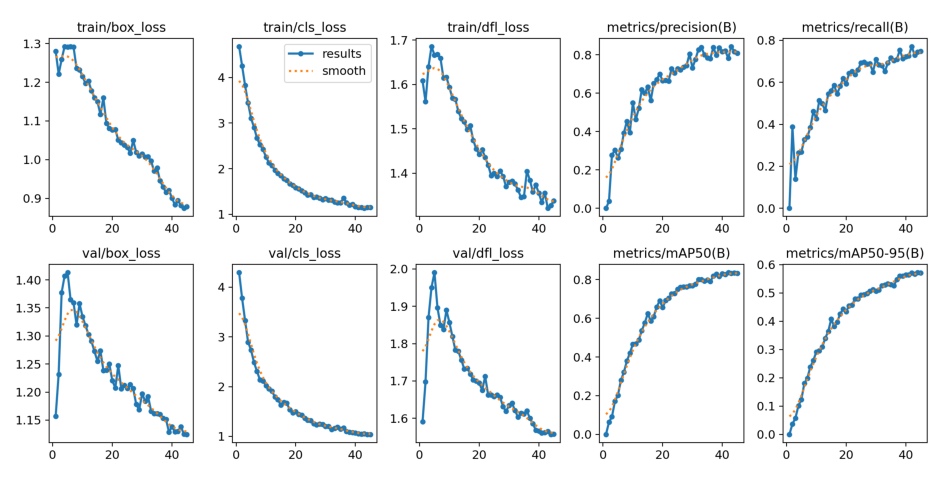

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

# Display results.png
img = Image.open("runs/detect/train2/results.png")
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()



image 1/1 /content/drive/MyDrive/green_calorie/test_broc.jpg: 448x640 4 broccolis, 63.5ms
Speed: 3.4ms preprocess, 63.5ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


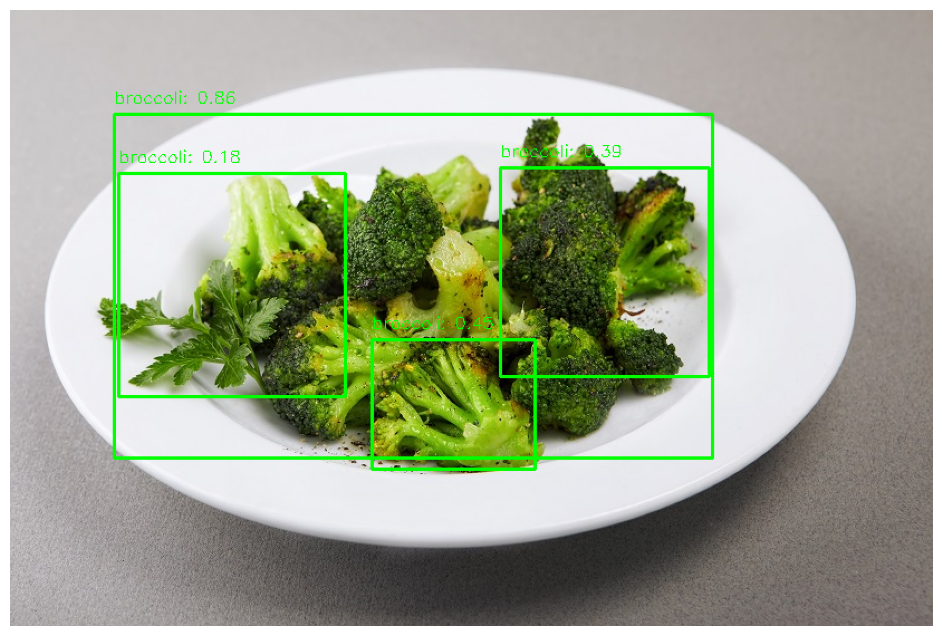


Detailed Detections:
Detection 1:
  Class: broccoli
  Top Confidence: 0.86
  Bounding Box: (93.21777, 93.15296, 629.97766, 401.06882)
  Top 3 Confidence Scores: 0.86, 0.45, 0.39
------------------------------
Detection 2:
  Class: broccoli
  Top Confidence: 0.45
  Bounding Box: (324.2385, 295.41516, 470.181, 411.5345)
  Top 3 Confidence Scores: 0.86, 0.45, 0.39
------------------------------
Detection 3:
  Class: broccoli
  Top Confidence: 0.39
  Bounding Box: (439.2427, 141.9169, 626.7783, 328.6935)
  Top 3 Confidence Scores: 0.86, 0.45, 0.39
------------------------------
Detection 4:
  Class: broccoli
  Top Confidence: 0.18
  Bounding Box: (97.955, 146.28975, 300.31396, 346.7974)
  Top 3 Confidence Scores: 0.86, 0.45, 0.39
------------------------------


In [15]:
import cv2
import matplotlib.pyplot as plt

# Load the fine-tuned model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Perform inference on the test image
results = model.predict(
    source=Config.TEST_IMAGE_PATH,
    imgsz=Config.IMG_SIZE,
    conf=0.17  # Confidence threshold
)

# Load the image for visualization
image = cv2.imread(Config.TEST_IMAGE_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# To store detailed information about detections
detection_details = []

# Iterate over detections
for result in results[0].boxes.data:
    # Extract bounding box coordinates, confidence score, and class ID
    x1, y1, x2, y2, confidence, class_id = result.cpu().numpy()

    # Draw the bounding box with top confidence score
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color=(0, 255, 0), thickness=2)
    label = f"{Config.CLASSES[int(class_id)]}: {confidence:.2f}"
    cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), thickness=1)

    # Save details for printing below
    detection_details.append({
        "class": Config.CLASSES[int(class_id)],
        "top_confidence": confidence,
        "bbox": (x1, y1, x2, y2)
    })

# Display the image with bounding boxes and labels
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

# Print detailed top 3 confidence scores for each bounding box
print("\nDetailed Detections:")
for idx, det in enumerate(detection_details, start=1):
    print(f"Detection {idx}:")
    print(f"  Class: {det['class']}")
    print(f"  Top Confidence: {det['top_confidence']:.2f}")
    print(f"  Bounding Box: {det['bbox']}")
    # Retrieve the top 3 scores for detailed output
    confidence_scores = results[0].boxes.conf.cpu().numpy()
    top_3_scores = sorted(confidence_scores, reverse=True)[:3]
    print(f"  Top 3 Confidence Scores: {', '.join([f'{score:.2f}' for score in top_3_scores])}")
    print("-" * 30)


In [22]:
import cv2
import matplotlib.pyplot as plt

def test_image(model, image_path, classes, conf_threshold=0.2):
    """
    Perform inference on an image, draw bounding boxes, and print detection details.

    Args:
        model: Loaded YOLO model.
        image_path: Path to the test image.
        classes: List of class names.
        conf_threshold: Confidence threshold for filtering detections.
    """
    # Perform inference on the image
    results = model.predict(
        source=image_path,
        imgsz=Config.IMG_SIZE,
        conf=conf_threshold
    )

    # Load the image for visualization
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # To store detailed information about detections
    detection_details = []

    # Iterate over detections
    for result in results[0].boxes.data:
        # Extract bounding box coordinates, confidence score, and class ID
        x1, y1, x2, y2, confidence, class_id = result.cpu().numpy()

        # Draw the bounding box with top confidence score
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color=(0, 255, 0), thickness=2)
        label = f"{classes[int(class_id)]}: {confidence:.2f}"
        cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), thickness=1)

        # Save details for printing below
        detection_details.append({
            "class": classes[int(class_id)],
            "top_confidence": confidence,
            "bbox": (x1, y1, x2, y2)
        })

    # Display the image with bounding boxes and labels
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Print detailed detections
    print("\nDetailed Detections:")
    for idx, det in enumerate(detection_details, start=1):
        print(f"Detection {idx}:")
        print(f"  Class: {det['class']}")
        print(f"  Top Confidence: {det['top_confidence']:.2f}")
        print(f"  Bounding Box: {det['bbox']}")
        print("-" * 30)





image 1/1 /content/drive/MyDrive/green_calorie/test_broc.jpg: 448x640 3 broccolis, 11.6ms
Speed: 2.9ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


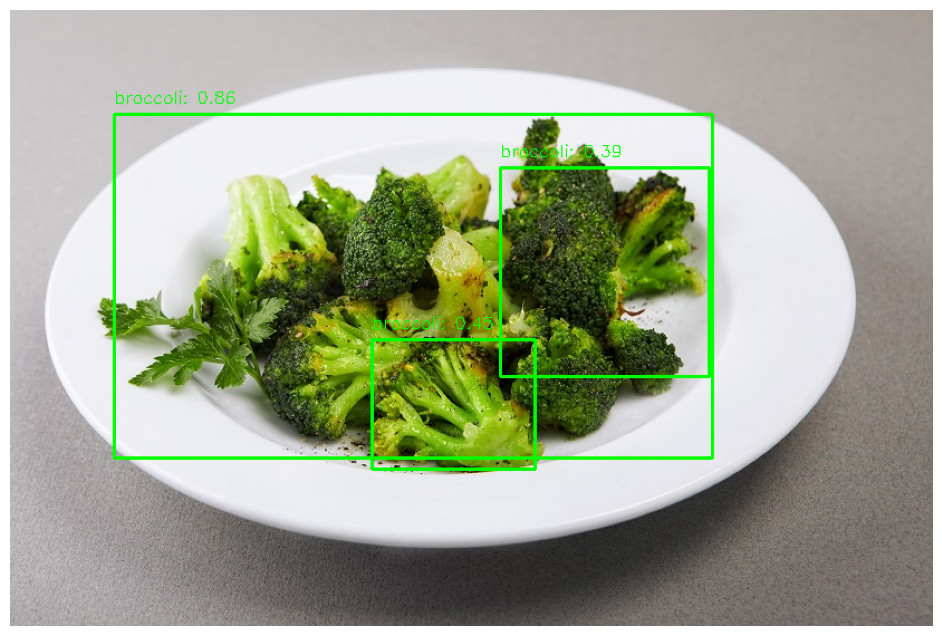


Detailed Detections:
Detection 1:
  Class: broccoli
  Top Confidence: 0.86
  Bounding Box: (93.21777, 93.15296, 629.97766, 401.06882)
------------------------------
Detection 2:
  Class: broccoli
  Top Confidence: 0.45
  Bounding Box: (324.2385, 295.41516, 470.181, 411.5345)
------------------------------
Detection 3:
  Class: broccoli
  Top Confidence: 0.39
  Bounding Box: (439.2427, 141.9169, 626.7783, 328.6935)
------------------------------


In [23]:
# Test first image
test_image(model, Config.TEST_IMAGE_PATH, Config.CLASSES)




image 1/1 /content/drive/MyDrive/green_calorie/test2.JPG: 416x640 2 peass, 9.4ms
Speed: 2.9ms preprocess, 9.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)


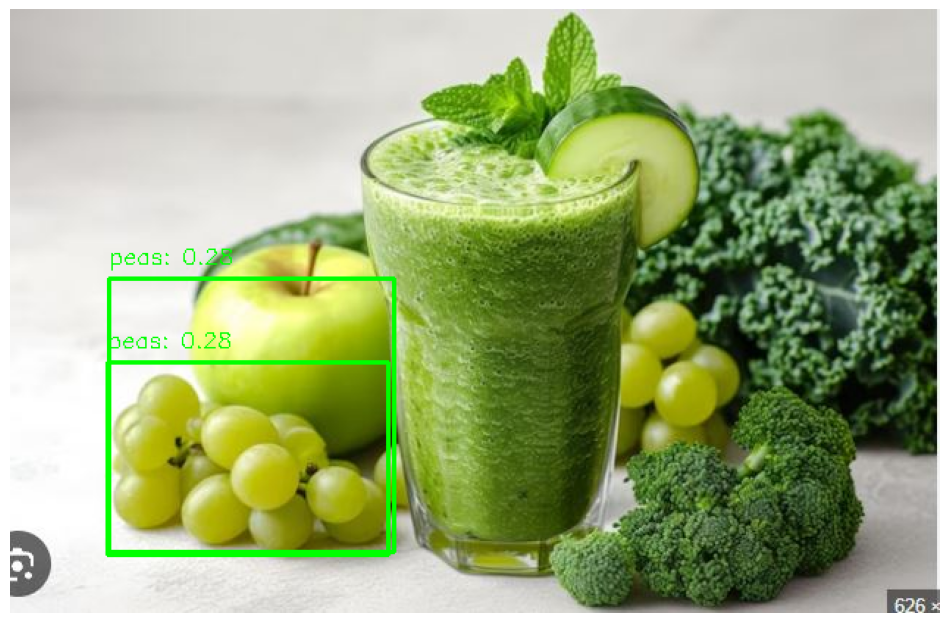


Detailed Detections:
Detection 1:
  Class: peas
  Top Confidence: 0.28
  Bounding Box: (66.215935, 240.83023, 257.74127, 371.857)
------------------------------
Detection 2:
  Class: peas
  Top Confidence: 0.28
  Bounding Box: (67.14357, 183.32791, 261.3058, 369.633)
------------------------------


In [24]:
# Test second image
test_image(model, '/content/drive/MyDrive/green_calorie/test2.JPG', Config.CLASSES)


image 1/1 /content/drive/MyDrive/green_calorie/test3.jpg: 448x640 1 avocados, 9.9ms
Speed: 2.2ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


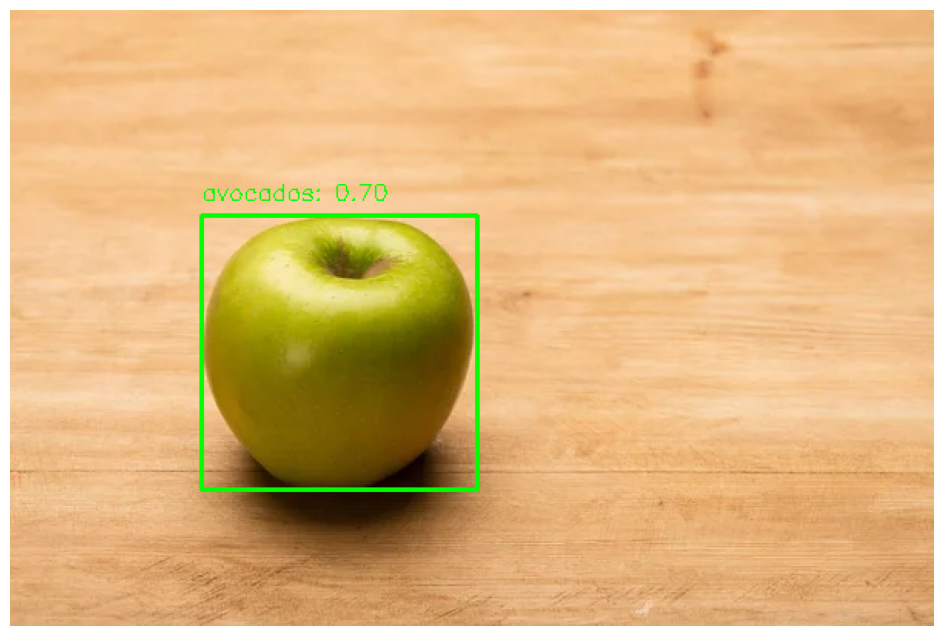


Detailed Detections:
Detection 1:
  Class: avocados
  Top Confidence: 0.70
  Bounding Box: (124.148735, 133.47095, 303.38965, 311.83386)
------------------------------


In [25]:
test_image(model, '/content/drive/MyDrive/green_calorie/test3.jpg', Config.CLASSES)


image 1/1 /content/drive/MyDrive/green_calorie/test4.jpg: 416x640 1 peas, 10.5ms
Speed: 2.5ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)


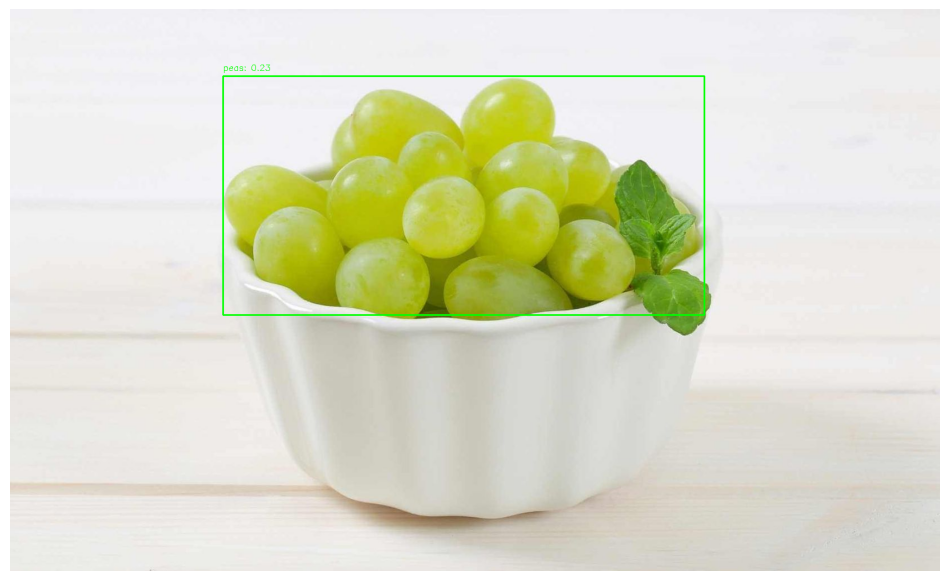


Detailed Detections:
Detection 1:
  Class: peas
  Top Confidence: 0.23
  Bounding Box: (379.85352, 119.23177, 1236.1957, 544.23364)
------------------------------


In [26]:
test_image(model, '/content/drive/MyDrive/green_calorie/test4.jpg', Config.CLASSES)


image 1/1 /content/drive/MyDrive/green_calorie/test6.jpg: 640x448 (no detections), 11.5ms
Speed: 2.8ms preprocess, 11.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)


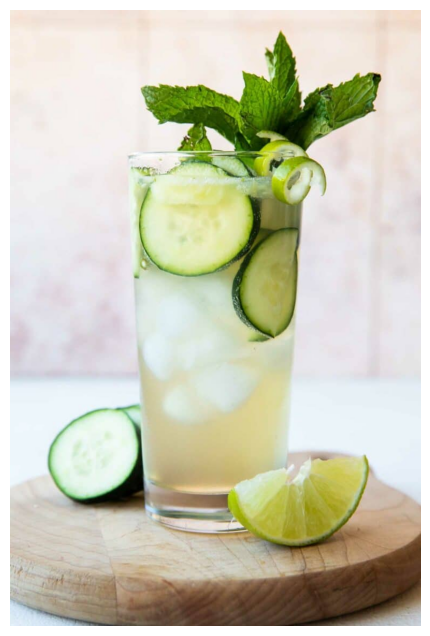


Detailed Detections:


In [27]:
test_image(model, '/content/drive/MyDrive/green_calorie/test6.jpg', Config.CLASSES)